In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
train_data = pd.read_csv('data/train_data_20221117.csv', index_col = 0)
test_data = pd.read_csv('data/test_data_20221117.csv', index_col = 0)

X_train = train_data.drop(columns = 'Survived')
y_train = train_data['Survived']
X_test  = test_data.drop(columns = 'Survived')
y_test  = test_data['Survived']

In [16]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameters = {
    'C': (0.5, 1, 5, 10),
    'kernel': ('rbf', 'sigmoid', 'linear'),
    'gamma': np.linspace(0.1, 1, 10)
}

clf = SVC()
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1

[CV] END ...................C=0.5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.8, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.8, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.8, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.5, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.5, kernel=linear; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.6, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .........................C=5, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.9, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ........C=10, gamma=0.30000000000000004, kernel=rbf; total time=   0.0s
[CV] END ........C=10, gamma=0.30000000000000004, kernel=rbf; total time=   0.0s
[CV] END ........C=10, gamma=0.30000000000000004, kernel=rbf; total time=   0.0s
[CV] END ........C=10, gamma=0.30000000000000004, kernel=rbf; total time=   0.0s
[CV] END ........C=10, gamma

[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.6, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=10, gamma=0.6, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.6, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.6, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': (0.5, 1, 5, 10),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ('rbf', 'sigmoid', 'linear')},
             scoring='f1', verbose=2)

In [17]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
display(results)
estimator = grid_search_estimator.best_estimator_

best score is 0.7645954374154613 with params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013485,0.009377,0.005891,0.007283,0.5,0.1,rbf,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}",0.775510,0.823529,...,0.888889,0.765957,0.750000,0.755556,0.697674,0.600000,0.714286,0.754413,0.072435,11
1,0.018129,0.007935,0.006754,0.007394,0.5,0.1,sigmoid,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.428571,0.380952,...,0.352941,0.434783,0.444444,0.432432,0.195122,0.242424,0.390244,0.356507,0.086221,86
2,0.009374,0.007654,0.003126,0.006252,0.5,0.1,linear,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.765957,0.840000,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.558140,0.744186,0.743816,0.087660,34
3,0.015098,0.005440,0.005889,0.007280,0.5,0.2,rbf,"{'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}",0.816327,0.823529,...,0.780488,0.739130,0.695652,0.755556,0.731707,0.625000,0.761905,0.750202,0.055186,21
4,0.031168,0.016312,0.008873,0.005765,0.5,0.2,sigmoid,"{'C': 0.5, 'gamma': 0.2, 'kernel': 'sigmoid'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.030549,0.007561,0.007903,0.004229,10,0.9,sigmoid,"{'C': 10, 'gamma': 0.9, 'kernel': 'sigmoid'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89
116,0.048935,0.017328,0.001100,0.002468,10,0.9,linear,"{'C': 10, 'gamma': 0.9, 'kernel': 'linear'}",0.765957,0.840000,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.558140,0.744186,0.743816,0.087660,34
117,0.033044,0.005011,0.011735,0.002332,10,1.0,rbf,"{'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}",0.765957,0.840000,...,0.755556,0.734694,0.682927,0.791667,0.714286,0.680851,0.716981,0.743847,0.046534,32
118,0.016937,0.002614,0.003525,0.006166,10,1.0,sigmoid,"{'C': 10, 'gamma': 1.0, 'kernel': 'sigmoid'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89


In [5]:
model = SVC(C = 5, gamma = 0.1, kernel =  'rbf')
model.fit(X_train, y_train)

SVC(C=5, gamma=0.1)

acc=0.8022388059701493
f1=0.7464114832535885


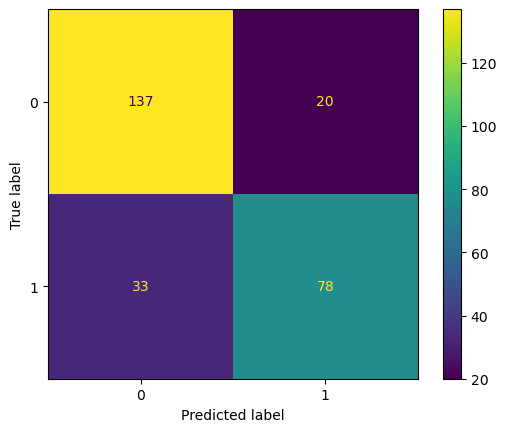

In [6]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'{acc=}')
print(f'{f1=}')
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [18]:
linear_SVM = SVC(C = 5, gamma = 0.1, kernel =  'rbf')
model.fit(X_train, y_train)

SVC(C=5, gamma=0.1)

In [21]:
results[results['param_kernel'] == 'linear']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.009374,0.007654,0.003126,0.006252,0.5,0.1,linear,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
5,0.021597,0.006852,0.004719,0.004497,0.5,0.2,linear,"{'C': 0.5, 'gamma': 0.2, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
8,0.035065,0.009059,0.009358,0.003058,0.5,0.3,linear,"{'C': 0.5, 'gamma': 0.30000000000000004, 'kern...",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
11,0.010145,0.006839,0.003503,0.006322,0.5,0.4,linear,"{'C': 0.5, 'gamma': 0.4, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
14,0.012346,0.008467,0.005510,0.005911,0.5,0.5,linear,"{'C': 0.5, 'gamma': 0.5, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
17,0.012840,0.007091,0.001108,0.002316,0.5,0.6,linear,"{'C': 0.5, 'gamma': 0.6, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
20,0.017727,0.003018,0.004347,0.002815,0.5,0.7,linear,"{'C': 0.5, 'gamma': 0.7000000000000001, 'kerne...",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
23,0.012913,0.006057,0.003525,0.004444,0.5,0.8,linear,"{'C': 0.5, 'gamma': 0.8, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
26,0.011996,0.006180,0.003125,0.006250,0.5,0.9,linear,"{'C': 0.5, 'gamma': 0.9, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
29,0.012893,0.009080,0.001702,0.001848,0.5,1.0,linear,"{'C': 0.5, 'gamma': 1.0, 'kernel': 'linear'}",0.765957,0.84,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.55814,0.744186,0.743816,0.08766,34
